In [1]:
import numpy as np
import math
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

In [2]:
A=np.array([[1,-2,-1,0],[-1,-1,0,-1]])
b=np.array([[-4],[-4]])
c=np.array([[-1],[-3],[0],[0]])
A=np.array(A)
b=np.array(b)
c=np.array(c)
m=len(A)
n=len(A[0,:])

$$
\begin{array}{rl}
\min & -x_0-3x_1\\
s.t. & x_0-2x_1 \geq -4\\
     & -x_0-x_1\geq -4\\
     &x_0,x_1\geq 0
\end{array}
\Rightarrow
\begin{array}{rl}
\min & -x_0-3x_1\\
s.t. & x_0-2x_1 -x_2= -4\\
     & -x_0-x_1-x_3= -4\\
     &x_0,x_1,x_2,x_3\geq 0
\end{array}
$$

In [3]:
modelLP = gp.Model("LP")
decVar={}
for j in range(n):
    decVar[j] = modelLP.addVar( name = "decVar" + str(j),lb=0)
for i in range(m):
    modelLP.addConstr(sum(A[i, j] * decVar[j] for j in range(n)) == b[i], "cons" + str(i))
obj = sum(c[i,0]*decVar[i] for i in range(n))
modelLP.setParam('OutputFlag',0)
modelLP.setObjective(obj, GRB.MINIMIZE)
modelLP.optimize()
for v in modelLP.getVars():
    print('%s %g' % (v.VarName, v.X))

print('Obj: %g' % obj.getValue())
optSol=[]
for v in modelLP.getVars():
    optSol.append(v.X)
print(optSol)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-02-12
decVar0 1.33333
decVar1 2.66667
decVar2 0
decVar3 0
Obj: -9.33333
[1.3333333333333333, 2.666666666666667, 0.0, 0.0]


$$
\begin{array}{rl}
\min & -\log(x_0)-\log(x_1)-\log(x_2)-\log(x_3)\\
s.t. & x_0-2x_1 -x_2= -4\\
     & -x_0-x_1-x_3= -4\\
     &x_0,x_1,x_2,x_3> 0
\end{array}
\Rightarrow
\begin{array}{rl}
\min & -t_0-t_1-t_2-t_3\\
s.t. & x_0-2x_1 -x_2= -4\\
     & -x_0-x_1-x_3= -4\\
     &t_0=\log(x_0)\\
     &t_1=\log(x_1)\\
     &t_3=\log(x_2)\\
     &t_4=\log(x_3)\\
     &x_0,x_1,x_2,x_3> 0
\end{array}
$$

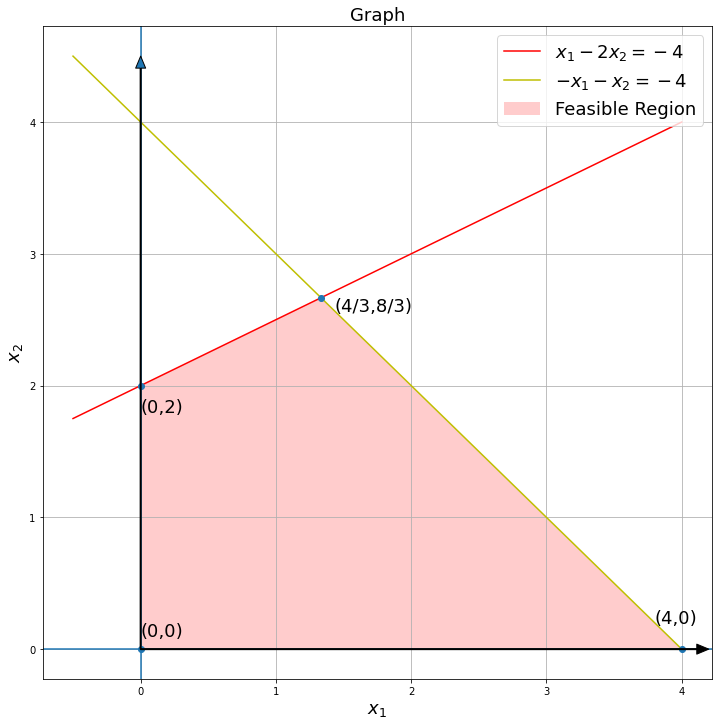

In [4]:
fig, ax = plt.subplots(figsize=(12, 12))
x = np.linspace(-1/2,4,100)
y = (x+4)/2
z= -x+4
ax.plot(x, y, '-r', label='$x_1-2x_2 = -4$')
ax.plot(x, z, '-y', label='$-x_1-x_2 = -4$')
ax.plot([0,0,4/3,4],[0,2,8/3,0],'o')
ax.axhline(y=0, xmin=-4, xmax=4)
ax.axvline(x=0, ymin=0, ymax=8)
ax.annotate("", xy=(0, 4.5), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.annotate("", xy=(4.2, 0), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10,color="black"))
ax.set_xlabel('$x_1$',fontsize=18)
ax.set_ylabel('$x_2$',fontsize=18)
ax.set_title('Graph',fontsize=18)
ax.text(0,0.1,'(0,0)',fontsize=18)
ax.text(0,1.8,'(0,2)',fontsize=18)
ax.text(4/3+0.1,8/3-0.1,'(4/3,8/3)',fontsize=18)
ax.text(4-0.2,0+0.2,'(4,0)',fontsize=18)
min_y_z=[]
for i in range(len(y)):
    min_y_z.append(min([y[i],z[i]]))
min_y_z=np.array(min_y_z)
ax.fill_between(x,0,min_y_z,where=(x >= 0),facecolor="red", alpha=0.2,label="Feasible Region")
ax.legend(loc='upper right',fontsize=18)

ax.grid()

In [5]:
modelPB = gp.Model("BarrierFuntions")
decVar={}
for j in range(n):
    decVar[j] = modelPB.addVar( name = "decVar" + str(j),lb=0)
t={}
for j in range(n):
    t[j] = modelPB.addVar( name = "t" + str(j)) #新增變數t0~3
for j in range(n):
    modelPB.addGenConstrLog(decVar[j], t[j])
for i in range(m):
    modelPB.addConstr(sum(A[i, j] * decVar[j] for j in range(n)) == b[i], "cons" + str(i))

obj = sum(-t[i] for i in range(n))
modelPB.setParam('OutputFlag',0)
modelPB.setObjective(obj, GRB.MINIMIZE)
modelPB.optimize()

center=[]
for v in modelPB.getVars():
    print('%s %g' % (v.VarName, v.X))
    center.append(v.X)
print('Obj: %g' % obj.getValue())
print(center)

decVar0 1.78857
decVar1 1
decVar2 3.78857
decVar3 1.21143
t0 0.581417
t1 0
t2 1.33199
t3 0.191789
Obj: -2.1052
[1.7885714285714287, 1.0, 3.7885714285714283, 1.2114285714285713, 0.5814172166166393, 0.0, 1.3319890162623484, 0.19178917566923165]


Text(1.8885714285714288, 0.7, '(x1*,x2*)=(1.79,1.00)')

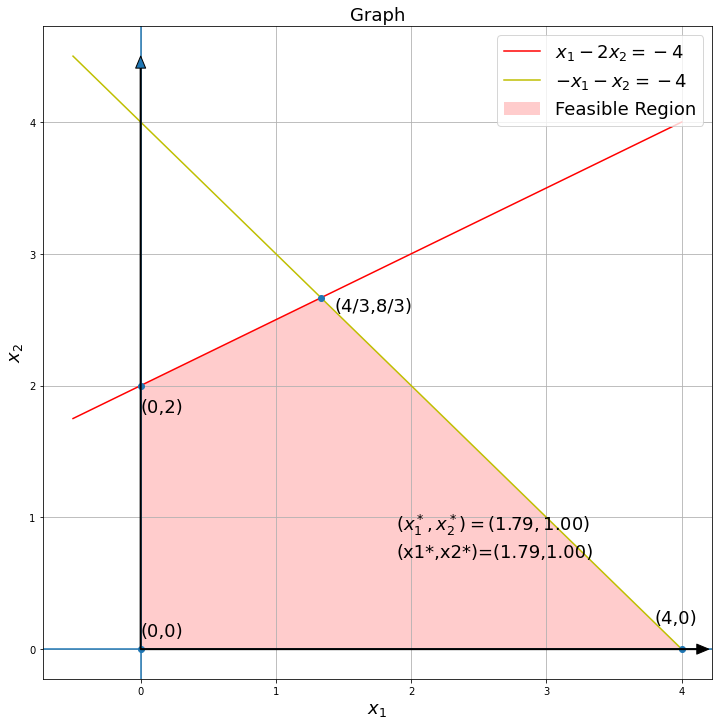

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))
x = np.linspace(-1/2,4,100)
y = (x+4)/2
z= -x+4
ax.plot(x, y, '-r', label='$x_1-2x_2 = -4$')
ax.plot(x, z, '-y', label='$-x_1-x_2 = -4$')
ax.plot([0,0,4/3,4],[0,2,8/3,0],'o')
ax.axhline(y=0, xmin=-4, xmax=4)
ax.axvline(x=0, ymin=0, ymax=8)
ax.annotate("", xy=(0, 4.5), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.annotate("", xy=(4.2, 0), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10,color="black"))
ax.set_xlabel('$x_1$',fontsize=18)
ax.set_ylabel('$x_2$',fontsize=18)
ax.set_title('Graph',fontsize=18)
ax.text(0,0.1,'(0,0)',fontsize=18)
ax.text(0,1.8,'(0,2)',fontsize=18)
ax.text(4/3+0.1,8/3-0.1,'(4/3,8/3)',fontsize=18)
ax.text(4-0.2,0+0.2,'(4,0)',fontsize=18)
min_y_z=[]
for i in range(len(y)):
    min_y_z.append(min([y[i],z[i]]))
min_y_z=np.array(min_y_z)
ax.fill_between(x,0,min_y_z,where=(x >= 0),facecolor="red", alpha=0.2,label="Feasible Region")
ax.legend(loc='upper right',fontsize=18)
ax.grid()
ax.text(center[0]+0.1,center[1]-0.1,'$(x_1^*,x_2^*)=(%.2f,%.2f)$' % (center[0],center[1]),fontsize=18)
ax.text(center[0]+0.1,center[1]-0.3,'(x1*,x2*)=(%.2f,%.2f)' % (center[0],center[1]),fontsize=18)

